In [1]:
import os
import glob
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import matplotlib.transforms

In [2]:
documents = os.chdir("filtered_data/")

In [3]:
# combines all filtered data into a singular csv
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
os.chdir("..")
combined_csv.to_csv( "traffic_all_years.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv("traffic_all_years.csv")
df

,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,QT_VOLUME_24HOUR,combined_peak
0,2,2014,0.000000,0.000000,0.000000,0.000000
1,100,2014,1957.277778,7214.755556,27251.911111,9172.033333
2,101,2014,1844.444444,5509.588889,23116.288889,7354.033333
3,102,2014,2359.188889,7246.955556,30201.944444,9606.144444
4,103,2014,1405.833333,3723.622222,16865.644444,5129.455556
...,...,...,...,...,...,...
27362,15275,2020,0.000000,0.000000,0.000000,0.000000
27363,15655,2020,0.000000,0.000000,0.000000,0.000000
27364,15935,2020,0.000000,0.000000,0.000000,0.000000
27365,16302,2020,0.000000,0.000000,0.000000,0.000000


In [5]:
pop = pd.read_csv("population_growth.csv")
pop

,Population,Year,Change,% Change
0,5841.7,2014,106.7,1.9
1,5938.1,2015,99.4,1.7
2,6068.0,2016,123.1,2.1
3,6323.6,2017,144.4,2.3
4,6459.8,2018,138.2,2.2
5,6594.8,2019,132.8,2.1
6,6694.9,2020,98.0,1.5


In [6]:
# adds a coloumn for population corresponding to that year (data taken from population_growth.csv)
df['population_of_yr']= '0'
df.loc[df.QT_INTERVAL_COUNT ==2014,'population_of_yr'] = '5841.7.8'
df.loc[df.QT_INTERVAL_COUNT ==2015,'population_of_yr'] = '5938.1'
df.loc[df.QT_INTERVAL_COUNT ==2016,'population_of_yr'] = '6068.0'
df.loc[df.QT_INTERVAL_COUNT ==2017,'population_of_yr'] = '6323.6'
df.loc[df.QT_INTERVAL_COUNT ==2018,'population_of_yr'] = '6459.8'
df.loc[df.QT_INTERVAL_COUNT ==2019,'population_of_yr'] = '6594.8'
df.loc[df.QT_INTERVAL_COUNT ==2020,'population_of_yr'] = '6694.9'
df.sort_values(by=['population_of_yr'], inplace=True,ascending= False)
df

,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,QT_VOLUME_24HOUR,combined_peak,population_of_yr
27366,16311,2020,0.000000,0.000000,0.000000,0.000000,6694.9
24495,2293,2020,1366.888889,3930.888889,17066.788889,5297.777778,6694.9
24509,2308,2020,1884.133333,6668.322222,28711.600000,8552.455556,6694.9
24508,2307,2020,3526.633333,10261.344444,48003.711111,13787.977778,6694.9
24507,2306,2020,4264.466667,12160.533333,59134.544444,16425.000000,6694.9
...,...,...,...,...,...,...,...
2382,4154,2014,1285.433333,3739.388889,20276.055556,5024.822222,5841.7.8
2381,4153,2014,1036.344444,2881.055556,13925.277778,3917.400000,5841.7.8
2380,4152,2014,1372.433333,3297.988889,18374.244444,4670.422222,5841.7.8
2379,4150,2014,1813.633333,4658.044444,21424.666667,6471.677778,5841.7.8


In [7]:
# Sorts the dataframe and takes the top 100 roads with the highest average daily volumes
# https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
df2 = df
df2.sort_values(by=['QT_VOLUME_24HOUR'], inplace=True, ascending=False)
top_daily_vol = df2.groupby('QT_INTERVAL_COUNT').head(100)
top_daily_vol.sort_values(by=['QT_INTERVAL_COUNT'], inplace=True, ascending=False)
top_daily_vol

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,QT_VOLUME_24HOUR,combined_peak,population_of_yr
23164,206,2020,3981.244444,12184.933333,66863.666667,16166.177778,6694.9
25315,3382,2020,5755.633333,17265.555556,79358.588889,23021.188889,6694.9
25300,3360,2020,6513.555556,17490.788889,85837.200000,24004.344444,6694.9
25937,4187,2020,5893.022222,15988.566667,83980.688889,21881.588889,6694.9
24698,2628,2020,6367.400000,18045.088889,83715.333333,24412.488889,6694.9
...,...,...,...,...,...,...,...
1023,2020,2014,7254.177778,20672.211111,91631.800000,27926.388889,5841.7.8
1684,3151,2014,6449.944444,18551.500000,82608.888889,25001.444444,5841.7.8
2850,4711,2014,6106.077778,15941.633333,82640.766667,22047.711111,5841.7.8
1155,2337,2014,7565.411111,20703.911111,91694.644444,28269.322222,5841.7.8


In [8]:
# Sorts dataframe and takes the top 100 roads with the higheset average combined peak hour traffic volume.
df3 = df
df3.sort_values(by=['combined_peak'], inplace=True, ascending=False)
top_daily_peakhour = df3.groupby('QT_INTERVAL_COUNT').head(100)
top_daily_peakhour.sort_values(by=['QT_INTERVAL_COUNT'], inplace=True, ascending=False)
top_daily_peakhour

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,QT_VOLUME_24HOUR,combined_peak,population_of_yr
25062,3088,2020,4805.277778,14644.355556,68111.733333,19449.633333,6694.9
25137,3174,2020,5676.477778,17349.377778,70842.955556,23025.855556,6694.9
24530,2329,2020,5936.233333,18227.866667,89618.733333,24164.100000,6694.9
25300,3360,2020,6513.555556,17490.788889,85837.200000,24004.344444,6694.9
23620,725,2020,6206.311111,17701.088889,73757.222222,23907.400000,6694.9
...,...,...,...,...,...,...,...
1210,2438,2014,8109.511111,21270.177778,110202.966667,29379.688889,5841.7.8
1521,2929,2014,8028.233333,18859.466667,110808.088889,26887.700000,5841.7.8
669,948,2014,7641.444444,22428.688889,92961.888889,30070.133333,5841.7.8
1933,3541,2014,6664.944444,16816.788889,80643.488889,23481.733333,5841.7.8


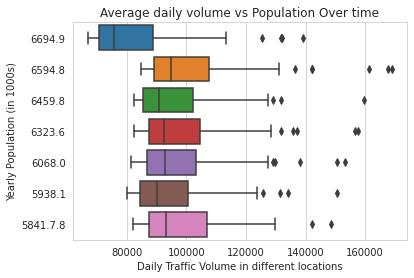

In [32]:
# Plots the population against the 100 highest roads' average daily volume
figure1 = plt.figure()
sns.set_style("whitegrid")
box_plot_1 = sns.boxplot(x = 'QT_VOLUME_24HOUR', y = 'population_of_yr',data = top_daily_vol)
box_plot_1.set(title = 'Average daily volume vs Population Over time')
box_plot_1.set(xlabel='Daily Traffic Volume in different locations', ylabel='Yearly Population (in 1000s)')
bbox = matplotlib.transforms.Bbox([[-0.35, -0.36], [7.50, 4.35]])
plt.savefig("Daily_volume.png", format = "png", dpi = 115,bbox_inches =bbox)

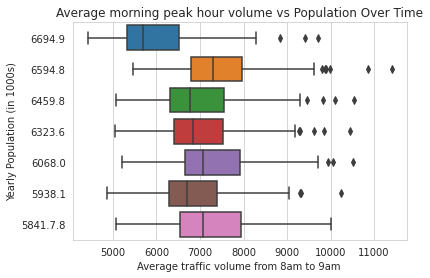

In [33]:
# Plots the population against the 100 highest roads' average morning peak hour volume\
# https://stackoverflow.com/questions/42767489/add-legend-to-seaborn-point-plot
figure2 = plt.figure()
sns.set_style("whitegrid")
box_plot_1 = sns.boxplot(x = 'from8to9', y = 'population_of_yr', data = top_daily_peakhour)
box_plot_1.set(title = 'Average morning peak hour volume vs Population Over Time')
box_plot_1.set(xlabel='Average traffic volume from 8am to 9am ', ylabel='Yearly Population (in 1000s)')
bbox = matplotlib.transforms.Bbox([[-0.35, -0.36], [7.50, 4.35]])
plt.savefig("Morning_Peak_Hour.png", format = "png", dpi = 115,bbox_inches =bbox)

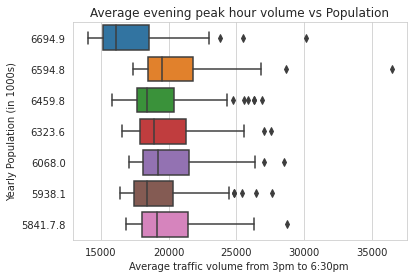

In [34]:
# Plots the population against the 100 highest roads' average evening peak hour volume
figure3 = plt.figure()
sns.set_style("whitegrid")
box_plot_2 = sns.boxplot(x = 'from3to6_30', y = 'population_of_yr', data = top_daily_peakhour)
box_plot_2.set(title = 'Average evening peak hour volume vs Population')
box_plot_2.set(xlabel='Average traffic volume from 3pm to 6:30pm ', ylabel='Yearly Population (in 1000s)')
bbox = matplotlib.transforms.Bbox([[-0.35, -0.36], [7.50, 4.35]])
plt.savefig("Evening_Peak_Hour.png", format = "png", dpi = 115,bbox_inches =bbox)